# section1 project
다음분기에 어떤 게임을 설계 해야 할까??

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/vgames2.csv'
df = pd.read_csv(filename)


In [ ]:
#결측치 확인
print(df['Name'].isna().sum())
print(df['Platform'].isna().sum())
print(df['Year'].isna().sum())
print(df['Genre'].isna().sum())
print(df['Publisher'].isna().sum())
print(df['NA_Sales'].isna().sum())
print(df['EU_Sales'].isna().sum())
print(df['JP_Sales'].isna().sum())
print(df['Other_Sales'].isna().sum())
#Year -271/ Genre-50 / publisher-58

0
0
271
50
58
0
0
0
0


In [ ]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

**1.지역에 따라서 선호하는 게임 장르가 다를까?**


In [ ]:
# 0~99 사이 년도년도 통일
def date(y):
  if y < 17:
    return 2000 + y
  elif 85 < y < 99:
    return 1900 + y
  else:
    return y

df['Year'] = df['Year'].apply(date)

In [ ]:
#판매량에 k,m 단위로 구분된것 정리 , object->float
def unit(x):
    if 'K' in x:
        x=x.replace('K','')
        return float(x)*0.001
    elif 'M' in x:
        x=x.replace('M','')
        return float(x)
    else:
        return float(x)


In [ ]:
df['NA_Sales'] = df['NA_Sales'].apply(unit)
df['EU_Sales'] = df['EU_Sales'].apply(unit)
df['JP_Sales'] = df['JP_Sales'].apply(unit)
df['Other_Sales'] = df['Other_Sales'].apply(unit)

In [ ]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
#결측치는 필요할때만 제거해서 사용을 할까??
#지역에 따라 선호하는 게임 장르가 다른가?
dfg=df.dropna(subset = ['Genre'] ) #장르 결측치 제거


In [ ]:
print(dfg['Genre'].isna().sum())

0


In [ ]:
# 지역별 각 장르의 출고량의 합계 
res1=dfg.groupby('Genre')['NA_Sales'].sum()
res2=dfg.groupby('Genre').EU_Sales.sum() #[] 로 묶는거랑 결과 같은듯??
res3=dfg.groupby('Genre').JP_Sales.sum()
res4=dfg.groupby('Genre').Other_Sales.sum()
res1

Genre
Action          874.81
Adventure       105.66
Fighting        223.20
Misc            408.05
Platform        446.44
Puzzle          123.35
Racing          357.19
Role-Playing    319.54
Shooter         581.92
Simulation      182.96
Sports          680.52
Strategy         68.70
Name: NA_Sales, dtype: float64

In [ ]:
#chi square test
#h0=장르와 각 국가간의 출고량은 연관이 없다.
chi_res1 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['NA_Sales']))
chi_res2 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['EU_Sales'])) 
chi_res3 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['JP_Sales'])) 
chi_res4 = stats.chi2_contingency(pd.crosstab(index=df['Genre'], columns=df['Other_Sales'])) 
print('NA=  ''p-value:{}'.format(chi_res1[1]))
print('EU=  ''p-value:{}'.format(chi_res2[1]))
print('JP=  ''p-value:{}'.format(chi_res3[1]))
print('Other_Sales=  ''p-value:{}'.format(chi_res4[1]))
#->0.05 보다 작다-> 귀무가설 기각 -> 연관이 있다.

NA=  p-value:9.279479700187457e-65
EU=  p-value:7.952423029324406e-39
JP=  p-value:3.4257531266088495e-173
Other_Sales=  p-value:3.726812689555557e-20


In [ ]:
# 각 지역의 출고량 합계 시각화

label = ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing',
         'Role-Playing','Shooter','Simulation','Sports','Strategy']
         #장르 종류
index = np.arange(len(label))


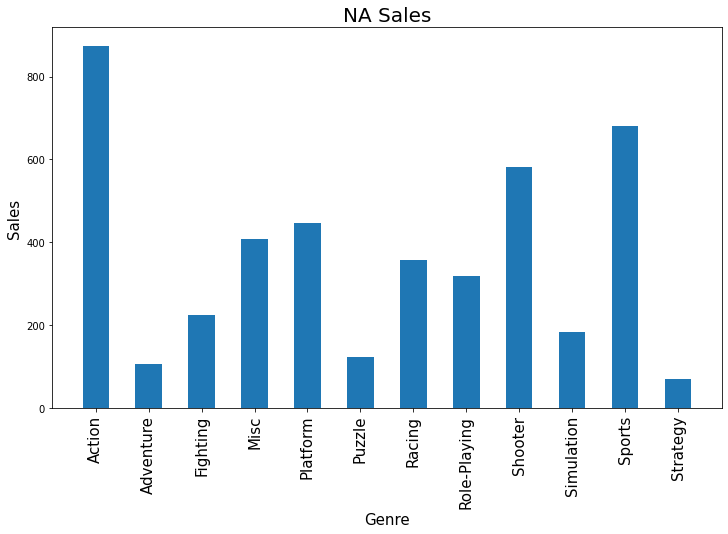

In [ ]:
#NA
plt.figure(figsize=(12,7))
plt.bar(index, res1,width=0.5)
plt.title('NA Sales', fontsize=20) #표 위에 이름
plt.xlabel('Genre', fontsize=15) # x축 이름
plt.ylabel('Sales', fontsize=15) # y축
plt.xticks(index, label, fontsize=15,rotation=90) #x축 항목별 이름
plt.show()
#액션,스포츠,사격 순 

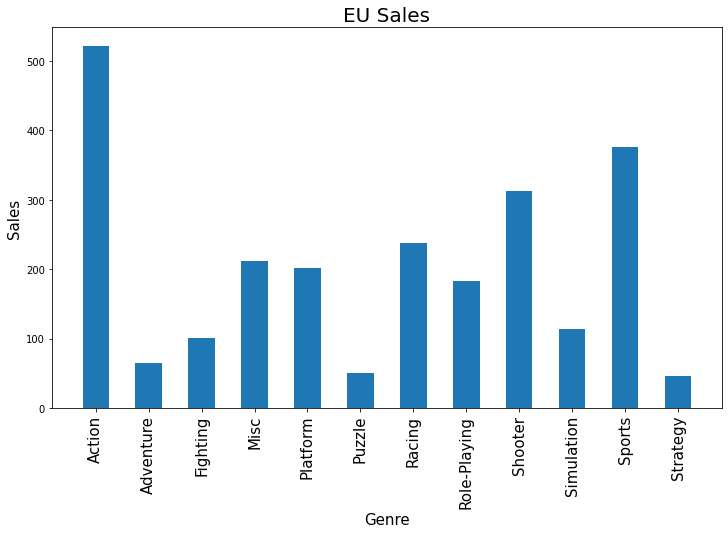

In [ ]:
#EU
plt.figure(figsize=(12,7))
plt.bar(index, res2,width=0.5)
plt.title('EU Sales', fontsize=20) #표 위에 이름
plt.xlabel('Genre', fontsize=15) # x축 이름
plt.ylabel('Sales', fontsize=15) # y축
plt.xticks(index, label, fontsize=15,rotation=90) #x축 항목별 이름
plt.show()
#액션,스포츠,사격 순 

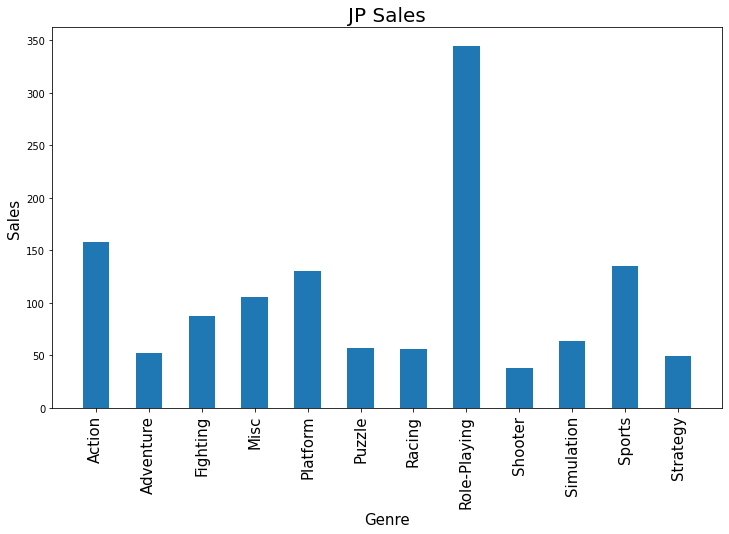

In [ ]:
#JP
plt.figure(figsize=(12,7))
plt.bar(index, res3,width=0.5)
plt.title('JP Sales', fontsize=20) #표 위에 이름
plt.xlabel('Genre', fontsize=15) # x축 이름
plt.ylabel('Sales', fontsize=15) # y축
plt.xticks(index, label, fontsize=15,rotation=90) #x축 항목별 이름
plt.show()
#롤플레잉,액션,스포츠 순 /다른 나라들과 다름.

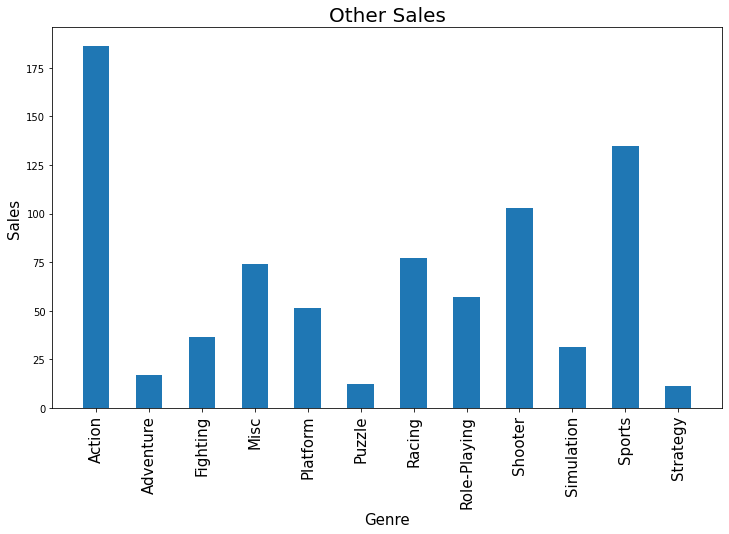

In [ ]:
#Other
plt.figure(figsize=(12,7))
plt.bar(index, res4,width=0.5)
plt.title('Other Sales', fontsize=20) #표 위에 이름
plt.xlabel('Genre', fontsize=15) # x축 이름
plt.ylabel('Sales', fontsize=15) # y축
plt.xticks(index, label, fontsize=15,rotation=90) #x축 항목별 이름
plt.show()
#액션,스포츠,사격 순 


# **2.연도별 게임의 트렌드가 있을까**

In [ ]:
dfyg=df.dropna(subset = ['Genre','Year']) #연도 장르 결측치 제거
dfyg=dfyg.sort_values(by=['Year'], axis=0) 

dfyg['Year'] #1980~2020년 까지 분포

13133    1980.0
7317     1980.0
14264    1980.0
9226     1980.0
5723     1980.0
          ...  
13771    2016.0
5310     2017.0
15233    2017.0
10107    2017.0
6906     2020.0
Name: Year, Length: 16277, dtype: float64

In [ ]:
# 총출고량
dfyg['total_sales'] = dfyg['NA_Sales'] + dfyg['EU_Sales'] + dfyg['JP_Sales'] + dfyg['Other_Sales']

In [ ]:
# chi square test 
#H0: 게임장르와 년도는 관련이 없다. #귀무가설
#H1: 연관이 있다. #대립가설
ygc = pd.crosstab(index=dfyg['Genre'], columns=dfyg['Year'])
chi_yg = stats.chi2_contingency(ygc)
print('p-value:{}'.format(chi_yg[1]))
 # pvalue 0.0 -> 귀무가설 기각 -> 연관이 있다.

p-value:0.0


연관이 있음을 검증


In [ ]:
Gbyg = pd.DataFrame(dfyg.groupby(by=['Year', 'Genre'])['Genre'].count().reset_index(name='count'))
Gbyg

,Year,Genre,count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1
386,2017.0,Role-Playing,2


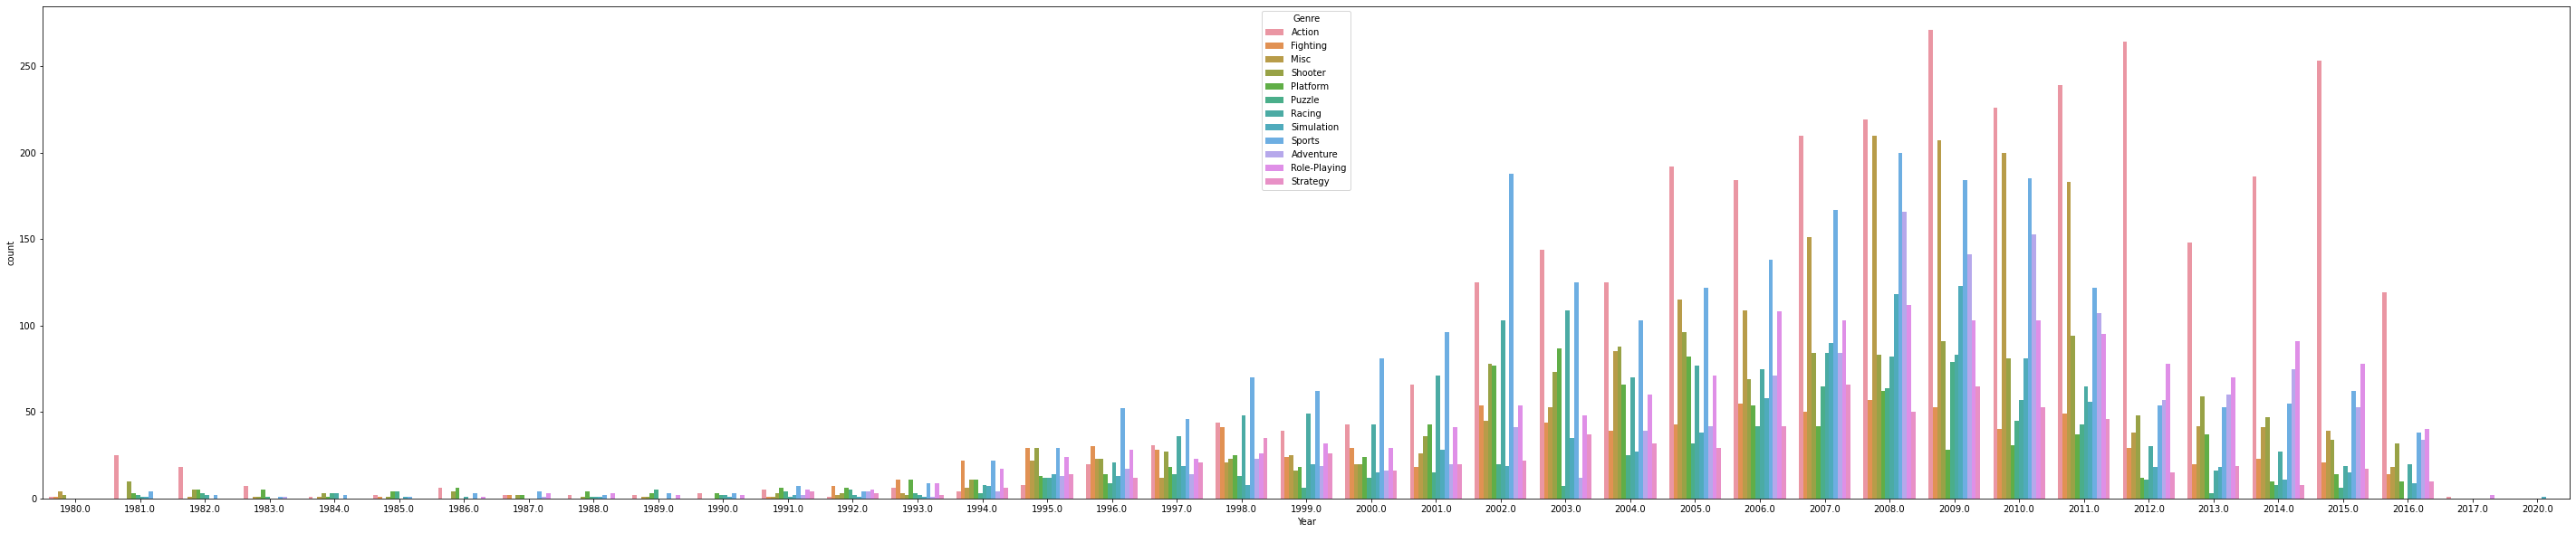

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(50,10))

sns.barplot(data=Gbyg, x='Year', y='count',hue='Genre', ax=ax, ci=None)
 
 
plt.show()

연도별 모든 장르의 판매량을 구했으나 보기 불편하다.
그렇다면 연도별로 제일 많이 팔린 장르를 구해보자

In [ ]:
year = dfyg.groupby(by=['Year', 'Genre'])['total_sales'].sum().reset_index()
y_sale = year.groupby(by=['Year'])['total_sales'].transform(max) == year['total_sales']
y_sale
y_sale2 = year[y_sale].reset_index(drop=True)
y_sale2
genre = y_sale2['Genre']
genre

0          Shooter
1           Action
2           Puzzle
3         Platform
4          Shooter
5         Platform
6           Action
7         Fighting
8         Platform
9           Puzzle
10        Platform
11        Platform
12        Fighting
13        Platform
14        Platform
15        Platform
16    Role-Playing
17          Racing
18          Sports
19    Role-Playing
20          Sports
21          Action
22          Action
23          Action
24          Action
25          Action
26          Sports
27          Action
28          Action
29          Sports
30          Action
31          Action
32          Action
33          Action
34          Action
35          Action
36          Action
37    Role-Playing
38      Simulation
Name: Genre, dtype: object

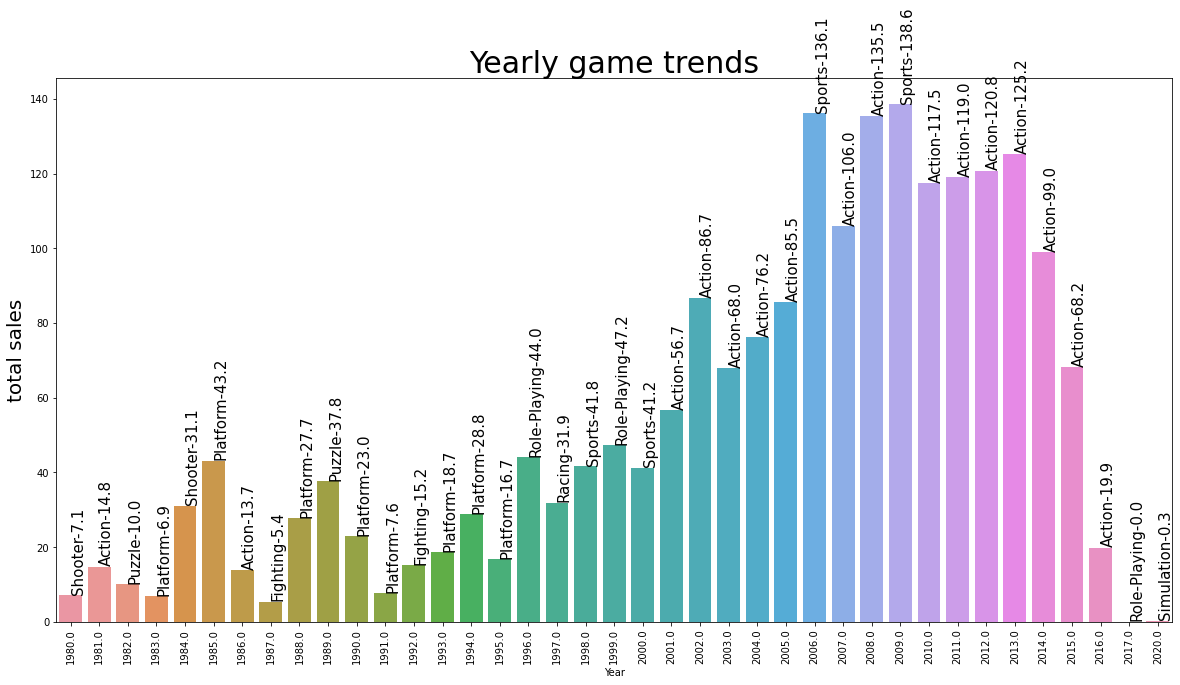

In [ ]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='total_sales', data=y_sale2)
index = 0
for value in y_sale2['total_sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 1))),size=15, rotation= 90)
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=10)
plt.ylabel("total sales", fontsize=20)

plt.xticks(rotation=90)
plt.show()

2000년도 이전까지는 연도별로 다양한 수요를 보였지만
2000년에 들어선 이후로는 액션 게임의 비중이 점차 늘어나더니 압도적으로 차지하게됨.
하지만 액션게임이 아닌 다른게임의 비중이 유동적으로 변경되는것으로 보아
연도와 게임의 트렌드는 연관이 있다.

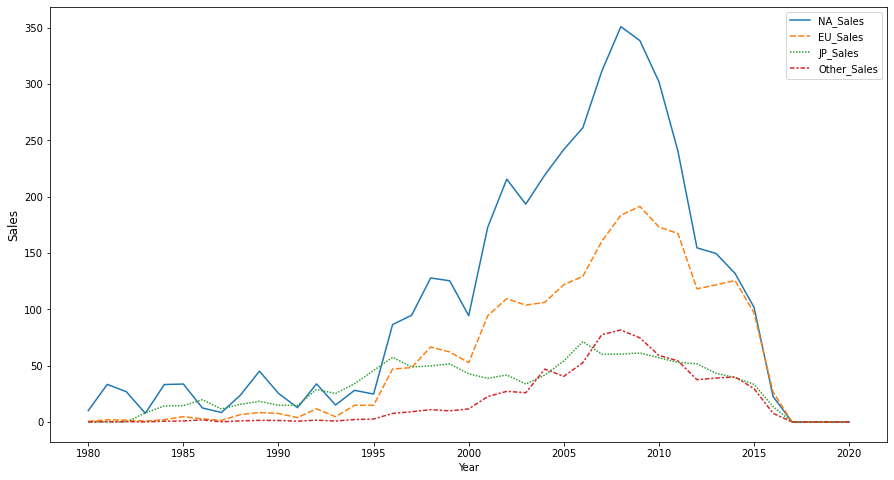

In [ ]:
#연도별 지역의 게임 판매량

ygt = dfyg.groupby('Year').sum()
ygt = ygt.sort_values(by=['total_sales'], ascending = False)
ygt = ygt['NA_Sales'], ygt['EU_Sales'], ygt['JP_Sales'], ygt['Other_Sales']
ygt = pd.DataFrame(data=ygt).T
plt.figure(figsize=(15,8))
plt.ylabel('Sales', fontsize=12)
sns.lineplot(data=ygt)


북미 지역은 꾸준하게 게임의 수요가 많은것으로 보여진다.


# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [ ]:
# 게임별 최고 판매 상위 10
gts = dfyg['total_sales'].groupby(dfyg['Name']).sum().sort_values(ascending=False).to_frame()
gts_top = gts.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gts_top

,total_sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.83
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.38
Call of Duty: Modern Warfare 3,30.84
New Super Mario Bros.,30.01


In [ ]:
fig = px.bar(data_frame=gts_top, x=gts_top.index, y='total_sales', color=gts_top.index)
fig.update_layout(title_text='Top 10 Games',title_x=0.5)

fig.show()


전체기간동안

위스포츠가 1등

gta가 2등

슈퍼마리오브라더스가 3등



# 다음년도에 무슨 게임을 출시해야할까??



In [ ]:
# 년도별로 여러 구간을 생성하기- 2010-2020
dfyg1=dfyg[(dfyg['Year']>= 2010.0) & (dfyg['Year'] < 2021.0)]
dfyg2=dfyg[(dfyg['Year']>= 1999.0) & (dfyg['Year'] < 2010.0)]
dfyg3=dfyg[(dfyg['Year']>= 2015.0) & (dfyg['Year'] < 2021.0)]

In [ ]:
#2010-2020
gts1 = dfyg1['total_sales'].groupby(dfyg1['Name']).sum().sort_values(ascending=False).to_frame()
gts_top1 = gts1.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gts_top1

fig1 = px.bar(data_frame=gts_top1, x=gts_top1.index, y='total_sales', color=gts_top1.index)
fig1.update_layout(title_text='Top 10 Games(2010-2020)',title_x=0.5)

#1999-2009
gts2 = dfyg2['total_sales'].groupby(dfyg2['Name']).sum().sort_values(ascending=False).to_frame()
gts_top2 = gts2.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gts_top2

fig2 = px.bar(data_frame=gts_top2, x=gts_top2.index, y='total_sales', color=gts_top2.index)
fig2.update_layout(title_text='Top 10 Games(1999-2009)',title_x=0.5)

#2015-2020
gts3 = dfyg3['total_sales'].groupby(dfyg3['Name']).sum().sort_values(ascending=False).to_frame()
gts_top3 = gts3.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gts_top3

fig11 = px.bar(data_frame=gts_top3, x=gts_top3.index, y='total_sales', color=gts_top3.index)
fig11.update_layout(title_text='Top 10 Games(2015-2020)',title_x=0.5)

In [ ]:

fig2.show()
fig1.show()
fig11.show()

**2000-2010**

wii sports

마리오카트wii

위스포츠 리조트

**2010-2020**

gta

콜오브듀티

콜오브듀티



# ---------------------------------------------------
어떤장르의 게임이 많이 팔리느가

In [ ]:
# chi square test 
#H0:연도와 출고량이 서로 연관이 없다.
chi_ty = stats.chi2_contingency(pd.crosstab(index=dfyg['total_sales'], columns=dfyg['Year']))
 
print('Year=  ''p-value:{}'.format(chi_ty[1]))
# pvalue 0.0 -> 연도랑 출고량이랑 관련 있음

Year=  p-value:0.0


In [ ]:
# chi square test 
#H0:장르와 출고량이 서로 연관이 없다.
chi_tg = stats.chi2_contingency(pd.crosstab(index=dfyg['total_sales'], columns=dfyg['Genre']))

print('Gerne=  ''p-value:{}'.format(chi_tg [1]))
# 귀무가설 기각->장르와 출고량은 연관이 있다.

Gerne=  p-value:4.715782209510347e-06


In [ ]:
gerne_ts=dfyg.groupby('Genre')['total_sales'].sum().to_frame()#1999-2009
gerne_ts_top = gerne_ts.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gerne_ts_top

fig3 = px.bar(data_frame=gerne_ts_top, x=gerne_ts_top.index, y='total_sales', color=gerne_ts_top.index)
fig3.update_layout(title_text='Top 10 Gerne',title_x=0.5)

In [ ]:
gerne_ts2=dfyg2.groupby('Genre')['total_sales'].sum().to_frame()#1999-2009
gerne_ts_top2 = gerne_ts2.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gerne_ts_top2

,total_sales
Genre,
Action,880.75
Sports,833.02
Misc,506.92
Racing,475.19
Role-Playing,459.44
Shooter,445.68
Platform,396.93
Simulation,277.10
Fighting,245.57


In [ ]:
gerne_ts1=dfyg1.groupby('Genre')['total_sales'].sum().to_frame() #2010-2020
gerne_ts_top1 = gerne_ts1.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gerne_ts_top1

,total_sales
Genre,
Action,669.64
Shooter,462.64
Sports,324.28
Role-Playing,291.30
Misc,229.30
Racing,123.65
Platform,120.75
Fighting,81.53
Simulation,71.27


In [ ]:
gerne_ts3=dfyg3.groupby('Genre')['total_sales'].sum().to_frame() #2015-2020
gerne_ts_top3 = gerne_ts3.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
gerne_ts_top3

,total_sales
Genre,
Action,88.11
Shooter,84.29
Sports,56.12
Role-Playing,43.22
Misc,12.81
Fighting,11.63
Adventure,9.82
Racing,9.59
Platform,8.13


In [ ]:
fig3 = px.bar(data_frame=gerne_ts_top1, x=gerne_ts_top1.index, y='total_sales', color=gerne_ts_top1.index)#2010-2020
fig3.update_layout(title_text='Top 10 Gerne(2010-2020)',title_x=0.5)

fig4 = px.bar(data_frame=gerne_ts_top2, x=gerne_ts_top2.index, y='total_sales', color=gerne_ts_top2.index)#1999-2009
fig4.update_layout(title_text='Top 10 Gerne(1999-2009)',title_x=0.5)

fig33 = px.bar(data_frame=gerne_ts_top3, x=gerne_ts_top3.index, y='total_sales', color=gerne_ts_top3.index)#2010-2020
fig33.update_layout(title_text='Top 10 Gerne(2015-2020)',title_x=0.5)

In [ ]:
fig4.show()
fig3.show()
fig33.show()

음...

전체적으로는 액션이 많으나

콜오브 듀티가 압도적 1등을 하면서 슈팅의 점유율을 다 차지하고 있음..

액션은 분할???

액션을 좋아하는 사람들이 많기는 하나 모일만한 게임이 없나?


인기있는 플렛폼은 어디인가??

In [ ]:
# chi square test 
#H0:플렛폼과 출고량이 서로 연관이 없다.
chi_tp = stats.chi2_contingency(pd.crosstab(index=dfyg['total_sales'], columns=dfyg['Platform']))

print('p-value:{}'.format(chi_tp [1]))
# 귀무가설 기각->플렛폼과 출고량은 연관이 있다.

p-value:9.445171916332799e-240


In [ ]:
p_ts=dfyg.groupby('Platform')['total_sales'].sum().to_frame() #2010-2020
p_ts_top = p_ts.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
p_ts_top

,total_sales
Platform,
PS2,1222.44
X360,968.60
PS3,946.74
Wii,900.15
DS,817.24
PS,725.16
GBA,312.65
PSP,290.84
PS4,275.78


In [ ]:
fig7 = px.bar(data_frame=p_ts_top, x=p_ts_top.index, y='total_sales', color=p_ts_top.index)
fig7.update_layout(title_text='Top 10 P',title_x=0.5)

In [ ]:
p_ts2=dfyg2.groupby('Platform')['total_sales'].sum().to_frame() #1999-2009
p_ts_top2 = p_ts2.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
p_ts_top2



,total_sales
Platform,
PS2,1216.87
DS,687.57
Wii,676.69
X360,412.45
PS3,345.55
GBA,312.65
PS,283.23
XB,247.30
PSP,226.53


In [ ]:
p_ts1=dfyg1.groupby('Platform')['total_sales'].sum().to_frame() #2010-2020
p_ts_top1 = p_ts1.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
p_ts_top1

,total_sales
Platform,
PS3,601.19
X360,556.15
PS4,275.78
3DS,231.83
Wii,223.46
XOne,141.08
DS,129.65
PC,119.83
WiiU,81.79


In [ ]:


p_ts3=dfyg3.groupby('Platform')['total_sales'].sum().to_frame() #2015-2020
p_ts_top3 = p_ts3.nlargest(10, 'total_sales')[['total_sales']] #nlargest 가장큰 n개
p_ts_top3

,total_sales
Platform,
PS4,152.19
XOne,70.03
3DS,33.52
PS3,20.73
WiiU,19.65
X360,13.85
PC,10.63
PSV,10.47
Wii,1.56


In [ ]:
fig5 = px.bar(data_frame=p_ts_top2, x=p_ts_top2.index, y='total_sales', color=p_ts_top2.index)#2010-2020
fig5.update_layout(title_text='Top 10 P(1999-2009)',title_x=0.5)

fig6 = px.bar(data_frame=p_ts_top1, x=p_ts_top1.index, y='total_sales', color=p_ts_top1.index)#2010-2020
fig6.update_layout(title_text='Top 10 P(2010-2020)',title_x=0.5)

fig66 = px.bar(data_frame=p_ts_top3, x=p_ts_top3.index, y='total_sales', color=p_ts_top3.index)#2015-2020
fig66.update_layout(title_text='Top 10 P(2015-2020)',title_x=0.5)




In [ ]:
fig5.show()
fig6.show()
fig66.show()